# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [64]:
import pandas as pd
import numpy as np

import datetime
from dateutil.relativedelta import relativedelta

# Viz mantra
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

import plotly.express as px
import plotly.graph_objects as go

# Statsmodel
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose


# Scikit learn
from sklearn.linear_model import LinearRegression #python3 -m pip install scikit-learn
# sci kit learn -> science kit for learning
# machine learning

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller

from statsmodels.tools.eval_measures import rmse


# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
sensor.head()


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
sensor.isnull().count()

#no nans


attitude.roll         1751
attitude.pitch        1751
attitude.yaw          1751
gravity.x             1751
gravity.y             1751
gravity.z             1751
rotationRate.x        1751
rotationRate.y        1751
rotationRate.z        1751
userAcceleration.x    1751
userAcceleration.y    1751
userAcceleration.z    1751
dtype: int64

How many rows and columns are in our data?

In [5]:
sensor.count("columns")
# 12 columns and 1751 raws

sensor


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299
...,...,...,...,...,...,...,...,...,...,...,...,...
1746,1.797120,-0.562324,2.445889,0.824443,0.533154,0.189844,-0.123211,0.909536,-0.379757,-0.268367,0.006733,-0.064874
1747,1.814297,-0.569719,2.449655,0.817212,0.539396,0.203020,-0.057641,0.723118,-0.437812,-0.102444,-0.060666,-0.229738
1748,1.830821,-0.578367,2.447967,0.809207,0.546658,0.215288,0.343238,0.997236,-0.338155,-0.085590,-0.030209,-0.087740
1749,1.849557,-0.586962,2.439458,0.800485,0.553834,0.229110,0.470144,1.227937,-0.332223,-0.048105,0.029555,0.060441


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [30]:
dates = pd.date_range("01/01/2018 00:00:00", "01/01/2018 00:29:10", periods=len(sensor))
dates



DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq=None)

Assign the time series index to the dataframe's index.

In [33]:
sensor.set_index(dates, inplace = True)

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [34]:
import statsmodels.api as sm


In [35]:
res = seasonal_decompose(sensor["userAcceleration.x"], model="additive", period=60)

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

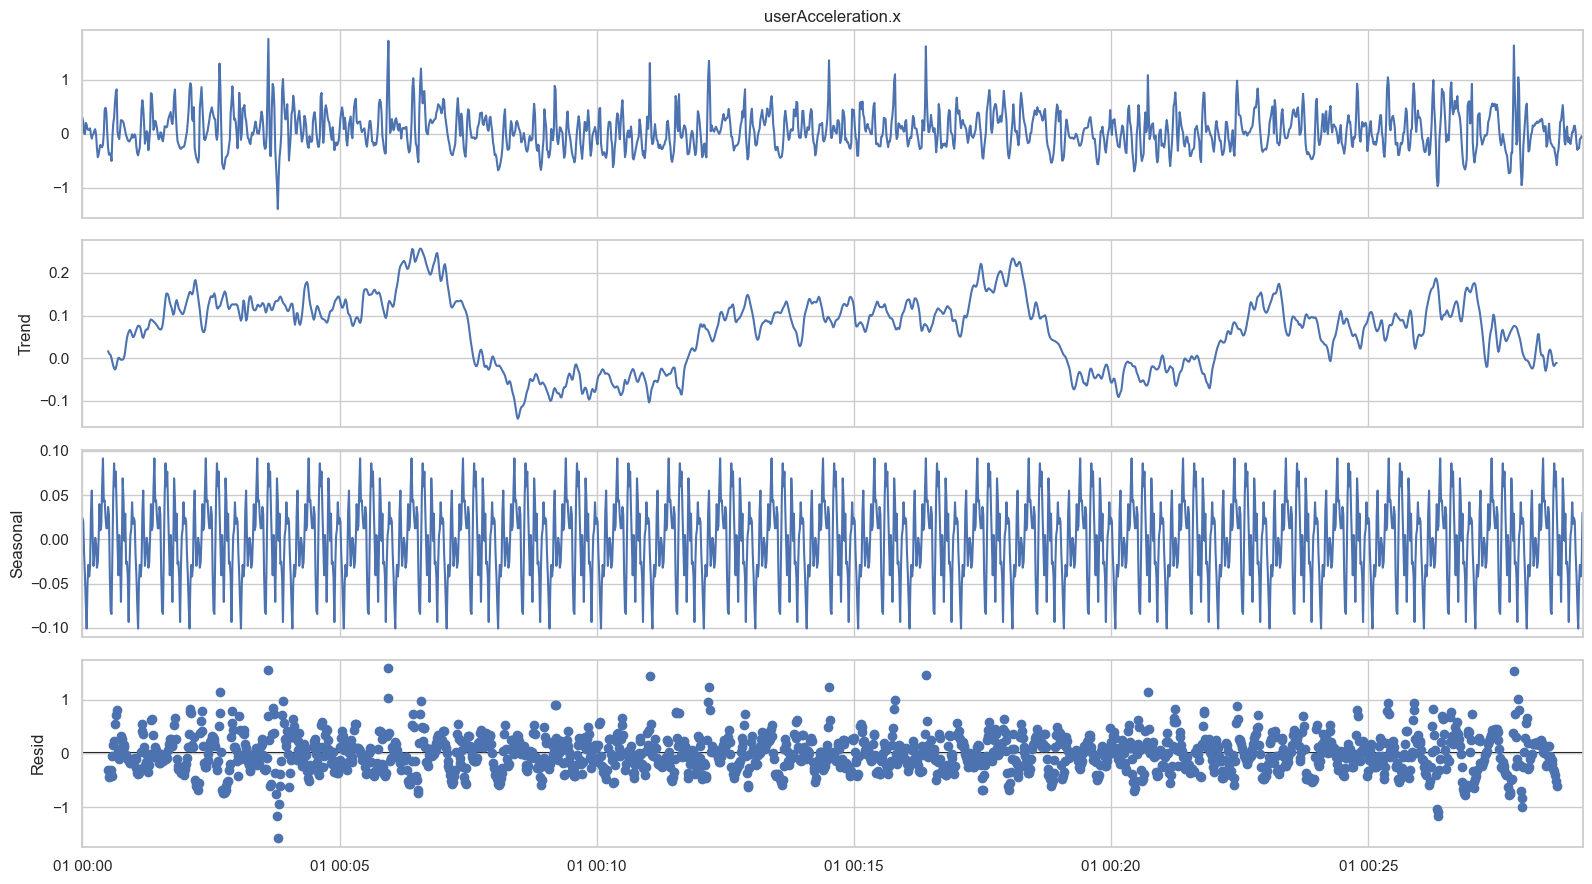

In [36]:
res.plot();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

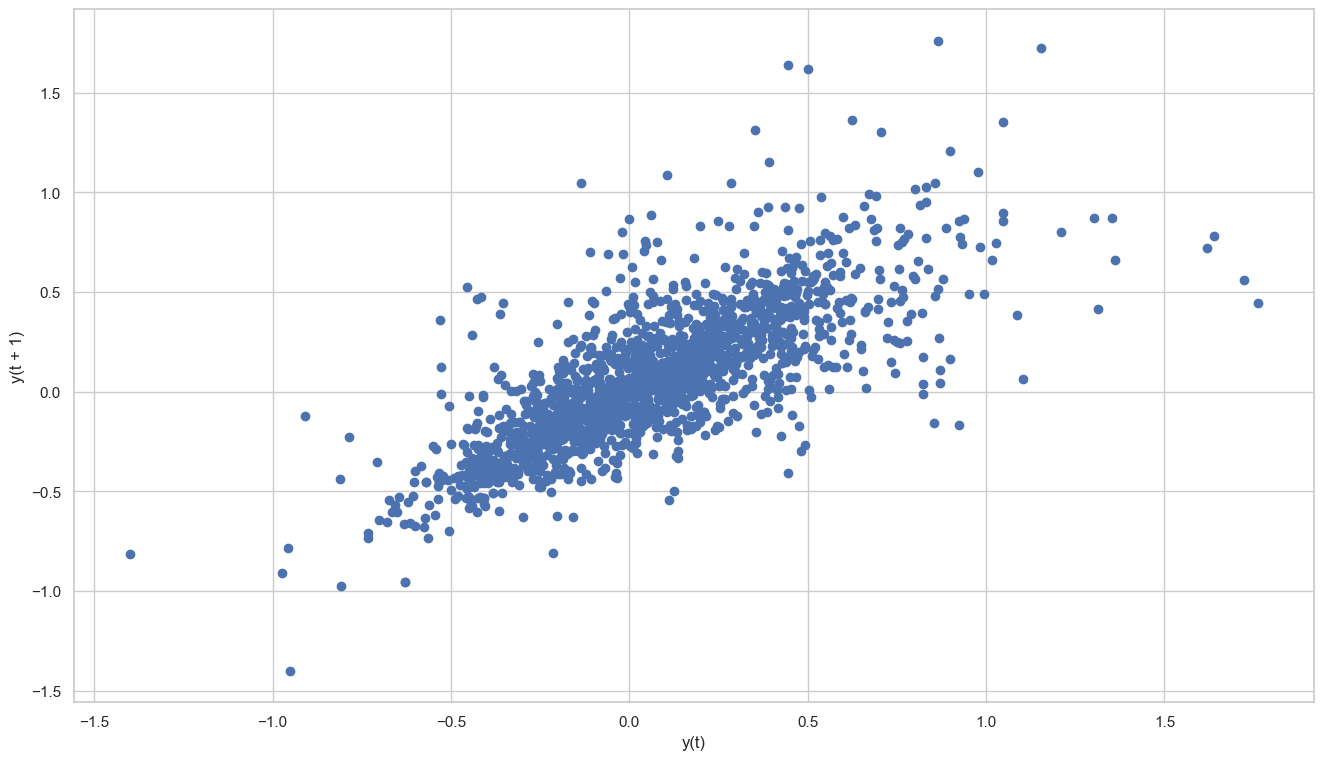

In [37]:
pd.plotting.lag_plot(sensor["userAcceleration.x"], lag=1);



Create a lag plot for `rotationRate.x`

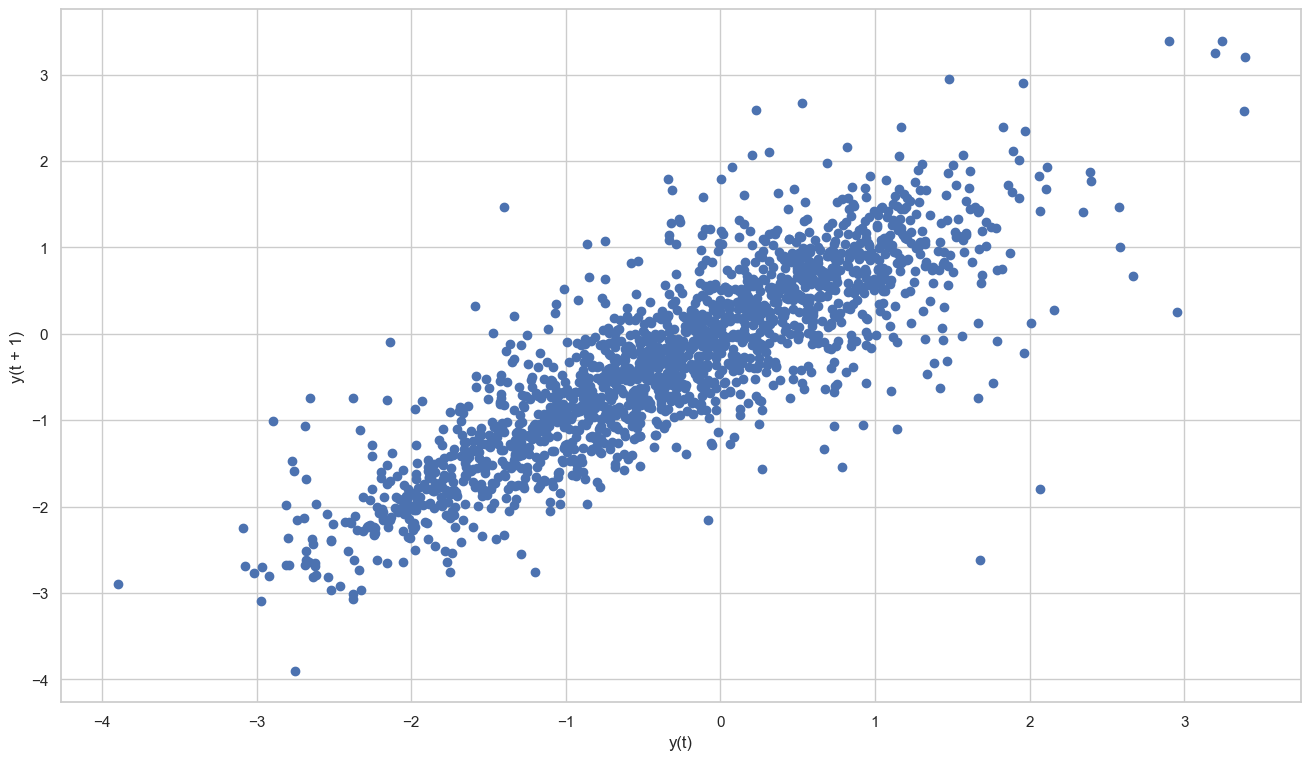

In [38]:
pd.plotting.lag_plot(sensor["rotationRate.x"], lag=1);


What are your conclusions from both visualizations?

In [39]:
# Both plots indicate a Positive Autocorrelation, the second one stronger than the first one

    # If the points tend to form a structure that slopes upwards from left to right, 
    # it indicates positive autocorrelation. This suggests that there is a tendency 
    # for each data point to be related to the previous one positively.

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [40]:
res = adfuller(sensor["rotationRate.x"])
res
p_value = res[1]
p_value

6.320230335912299e-06

In [41]:
def dickey_rejects (series, alpha = 0.05):
    
    p_value = adfuller(series)[0]
    
    h0 = "The series is NOT stationary"
    h1 = "The series IS stationary"
    
    if p_value < alpha:
        return f"We reject H0 and accept H1: {h1}"
    
    elif p_value > alpha:
        return f"We don't have enough info to reject H0, so we keep H0: {h0}"

In [42]:
dickey_rejects(sensor["userAcceleration.x"])

'We reject H0 and accept H1: The series IS stationary'

In [43]:
dickey_rejects(sensor["rotationRate.x"])

'We reject H0 and accept H1: The series IS stationary'

What are your conclusions from this test?

In [44]:
"""
For both variables we can see after the test that they are stationary.

Meaning that both show the following properties:

1. Constant Mean (μ): The mean of the series remains constant over time. 
    It doesn't exhibit a trend or systematic change in its average value.

2. Constant Variance (σ^2): The variance or standard deviation of the series remains constant over time. 
    The spread or dispersion of data points around the mean doesn't change systematically.

3. Constant Autocovariance and Autocorrelation: 
    The relationship between observations at different time points (autocovariance or autocorrelation) 
    remains constant. This implies that the relationship between data points and their lags doesn't 
    change over time.
"""

"\nFor both variables we can see after the test that they are stationary.\n\nMeaning that both show the following properties:\n\n1. Constant Mean (μ): The mean of the series remains constant over time. \n    It doesn't exhibit a trend or systematic change in its average value.\n\n2. Constant Variance (σ^2): The variance or standard deviation of the series remains constant over time. \n    The spread or dispersion of data points around the mean doesn't change systematically.\n\n3. Constant Autocovariance and Autocorrelation: \n    The relationship between observations at different time points (autocovariance or autocorrelation) \n    remains constant. This implies that the relationship between data points and their lags doesn't \n    change over time.\n"

## Bonus: Challenge 2

Finally, we'll create an ARIMA model for `userAcceleration.x`. Load the `ARIMA` function from `statsmodels`. The order of the model is (2, 0, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [45]:
from statsmodels.tsa.arima.model import ARIMA

In [46]:
order = (2, 0, 1)

In [47]:
# 0. Splitting into train & test
y_train = sensor["userAcceleration.x"][:-10]
y_test = sensor["userAcceleration.x"][-11:]

In [53]:
# 1. Create an instance of the ARIMA model that takes y_train, the order, and freq="S"
# Docs: https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima.model.ARIMA.html

model = ARIMA(y_train, order=order, freq="S")



In [54]:
# 2. Fit the model:

model = model.fit()


In [60]:
# 3. Predict: create y_pred:

y_pred = model.predict(start=len(y_train), end=len(y_train)+10)

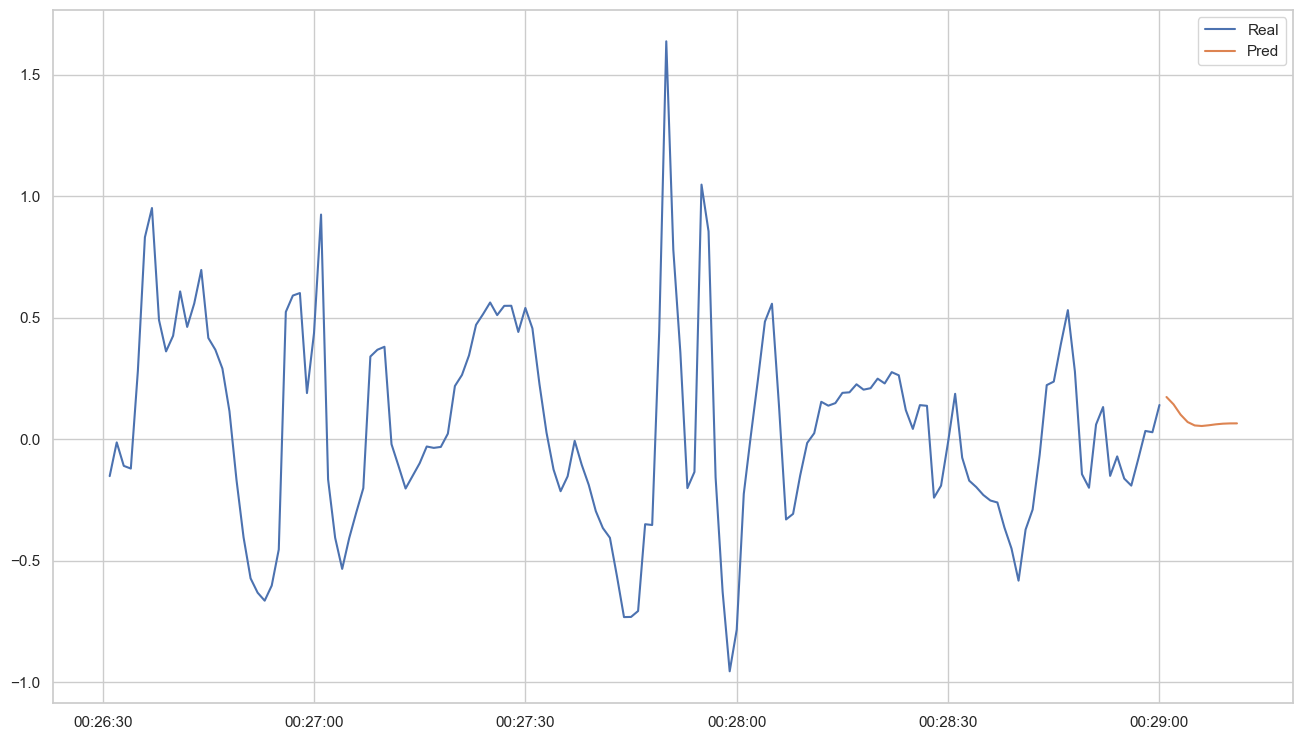

In [61]:
# 4. Visualize
plt.plot(y_train[-150:], label = "Real")
plt.plot(y_pred[-150:], label = "Pred")
plt.legend()

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

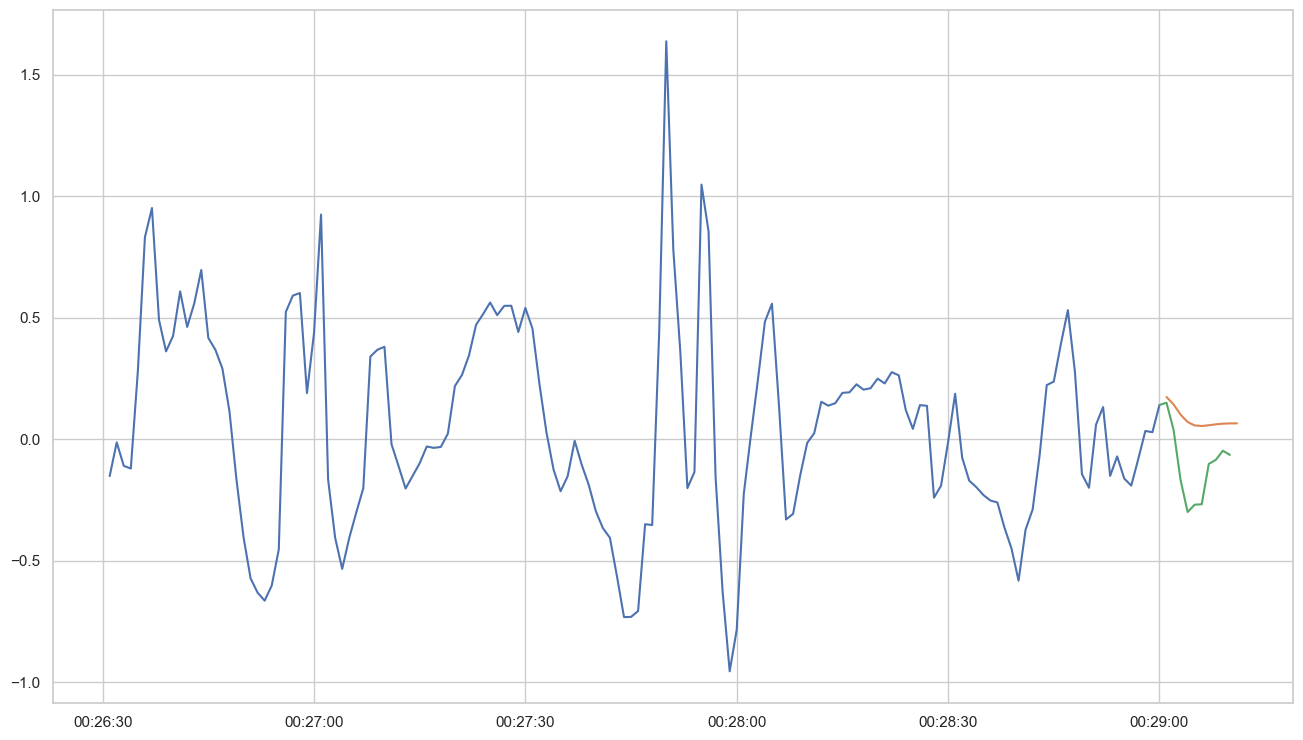

In [69]:
# Your code here:

rmse(y_pred, y_test)
plt.plot(y_train[-150:])
plt.plot(y_pred)
plt.plot(y_test)